# System Model V3 - Punchline simulation

The purpose of this notebook is to simulate a single run of the full CDP and APT system model, using a stochastic Ethereum price and liquidity demand process as a driver.


We want to run a basic simuluation in order to serve as a sanity check. We want the simulation to have no liquidity shocks, the controller on and off, to show the difference, arbitrageur considers the liquidation ratio, and target price scaling. The market price presented should be stable and should reflect the movement and volatility of the realized sample path of the ETH price.

In order to test this, configure the following experiment [punchline.py](https://github.com/BlockScience/reflexer/blob/master/experiments/system_model_v3/punchline.py). We use the recommended params with a sweep of controller on/off. Run run this simulation, we create a directory in the ```experiments/system_model_v3``` called ```punchline/```,and add a ```logs/``` directory inside of it.

Assuming our we have all of the requirements required (run requirements.txt from the ```reflexer/``` root directory to be sure) and assuming our terminal is in the root directory, we run the follow to run the simulation:

```bash
python -m experiments.system_model_v3.recommended_params
```
And our simulation will run. The resulting [run log](https://github.com/BlockScience/reflexer/blob/master/experiments/system_model_v3/punchline/experiment_run_log.md)
 can be found in the ```experiments/system_model_v3/punchline/``` directory, along with the simulation results stored as ```experiment_results.hdf5```


Below we will import and examine the simulation results.


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## Import simulation run data


In [2]:
os.getcwd()

'/home/aclarkdata/repos/reflexer/notebooks/analysis'

In [3]:
os.chdir('../../')
os.getcwd()

'/home/aclarkdata/repos/reflexer'

In [4]:
experiment_results = 'experiments/system_model_v3/punchline/experiment_results.hdf5'
experiment_results_keys = []
with pd.HDFStore(experiment_results) as store:
    experiment_results_keys = list(filter(lambda x: "results" in x, store.keys()))
    exceptions_keys = list(filter(lambda x: "exceptions" in x, store.keys()))

In [5]:
# A list of all experiment result keys
experiment_results_keys

['/results_2021-04-01T13:46:42.712218',
 '/results_2021-04-01T14:33:48.810414',
 '/results_2021-04-01T15:51:20.021905',
 '/results_2021-04-01T16:17:28.868908']

In [6]:
# Copy a results_ key from the above keys to select the experiment
experiment_results_key = experiment_results_keys[-1]#'results_2021-02-09T18:46:33.073363' # Or select last result: experiment_results_keys[-1]
experiment_timestamp = experiment_results_key.strip('results_')
exceptions_key = 'exceptions_' + experiment_timestamp
experiment_timestamp

'/results_2021-04-01T16:17:28.868908'

In [7]:
df_raw = pd.read_hdf(experiment_results, experiment_results_key)
df_raw.tail()

,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,RAI_balance,ETH_balance,UNI_supply,uniswap_oracle,simulation,subset,run,substep,timestep,events
42018,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,28306800,2017-11-24 15:00:00,0,278.409589,-29055.464616,-13536.585632,...,188385.892651,3414.707325,220257.560011,None,0,0,5,18,7863,NaN
42019,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,28310400,2017-11-24 16:00:00,0,277.450723,122.861431,-6706.862101,...,268039.482093,2402.097863,220257.560011,None,0,0,5,18,7864,NaN
42020,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,28314000,2017-11-24 17:00:00,0,277.059262,-8.523462,-3357.692781,...,201941.666195,3190.697829,220257.560011,None,0,0,5,18,7865,NaN
42021,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,28317600,2017-11-24 18:00:00,0,276.145214,-20194.166619,-11775.929700,...,159427.449335,4044.265244,220257.560011,None,0,0,5,18,7866,NaN
42022,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,28321200,2017-11-24 19:00:00,0,274.931992,-17.456333,-5896.693017,...,96695.925356,6674.415748,220233.443152,<models.system_model_v3.model.parts.uniswap_or...,0,0,5,18,7867,NaN


## Post process

In [8]:
from experiments.system_model_v3.post_process import post_process_results
from experiments.system_model_v3.punchline import params, SIMULATION_TIMESTEPS

In [9]:
df = post_process_results(df_raw, params, set_params=['ki', 'kp', 'liquidation_ratio','controller_enabled'])
df

Adding new columns
0.042875051498413086
Getting parameter sweep
0.04299640655517578
Assigning parameters to subsets
0.10948061943054199
Creating target_price_scaled
0.11512303352355957


,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,substep,timestep,events,eth_collateral_value,collateralization_ratio,ki,kp,liquidation_ratio,controller_enabled,target_price_scaled
0,{},{},{},0,0,2017-01-01 00:00:00,0,294.069151,1.000000,1.000000,...,0,0,NaN,4.553000e+07,1.450000,-5.000000e-09,2.000000e-07,1.45,True,4.553000
1,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,3600,2017-01-01 01:00:00,0,291.208252,906.674484,453.837242,...,18,1,NaN,3.749497e+07,1.435893,-5.000000e-09,2.000000e-07,1.45,True,4.553000
2,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,7200,2017-01-01 02:00:00,0,292.287792,-186.992295,133.422473,...,18,2,NaN,3.763397e+07,1.455375,-5.000000e-09,2.000000e-07,1.45,True,4.553000
3,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,10800,2017-01-01 03:00:00,0,289.343698,209.658450,171.540462,...,18,3,NaN,3.725489e+07,1.435395,-5.000000e-09,2.000000e-07,1.45,True,4.553000
4,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,14400,2017-01-01 04:00:00,0,286.827771,-79.844839,45.847811,...,18,4,NaN,3.693095e+07,1.437392,-5.000000e-09,2.000000e-07,1.45,True,4.553000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42018,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,28306800,2017-11-24 15:00:00,0,278.409589,-29055.464616,-13536.585632,...,18,7863,NaN,7.841626e+06,1.455387,-5.000000e-09,2.000000e-07,1.45,True,0.364967
42019,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,28310400,2017-11-24 16:00:00,0,277.450723,122.861431,-6706.862101,...,18,7864,NaN,7.814619e+06,1.445540,-5.000000e-09,2.000000e-07,1.45,True,0.364833
42020,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,28314000,2017-11-24 17:00:00,0,277.059262,-8.523462,-3357.692781,...,18,7865,NaN,7.803593e+06,1.448489,-5.000000e-09,2.000000e-07,1.45,True,0.364698
42021,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,28317600,2017-11-24 18:00:00,0,276.145214,-20194.166619,-11775.929700,...,18,7866,NaN,7.777848e+06,1.445750,-5.000000e-09,2.000000e-07,1.45,True,0.364563


# Simulation Analysis

In [10]:
df.substep.unique()

array([ 0, 18])

In [11]:
df.run.unique()

array([1, 2, 3, 4, 5])

In [12]:
df.subset.unique()

array([0])

In [13]:
df.columns

Index(['cdp_metrics', 'optimal_values', 'sim_metrics', 'timedelta',
       'cumulative_time', 'timestamp', 'blockheight', 'eth_price',
       'liquidity_demand', 'liquidity_demand_mean', 'cdps', 'eth_collateral',
       'eth_locked', 'eth_freed', 'eth_bitten', 'principal_debt', 'rai_drawn',
       'rai_wiped', 'rai_bitten', 'accrued_interest', 'interest_bitten', 'w_1',
       'w_2', 'w_3', 'system_revenue', 'stability_fee', 'market_price',
       'market_price_twap', 'target_price', 'target_rate', 'eth_return',
       'eth_gross_return', 'expected_market_price', 'expected_debt_price',
       'error_star', 'error_star_integral', 'market_slippage', 'RAI_balance',
       'ETH_balance', 'UNI_supply', 'uniswap_oracle', 'simulation', 'subset',
       'run', 'substep', 'timestep', 'events', 'eth_collateral_value',
       'collateralization_ratio', 'ki', 'kp', 'liquidation_ratio',
       'controller_enabled', 'target_price_scaled'],
      dtype='object')

### Generate key plots for analysis

In [14]:
df = df.iloc[1:]
controller_on = df.query('controller_enabled==True and run == 4')

# calculate errors

controller_on['error'] = controller_on['target_price'] - controller_on['market_price']
controller_on['error_integral'] = controller_on['error'].cumsum()

<ipython-input-14-e9d168c0c4f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  controller_on['error'] = controller_on['target_price'] - controller_on['market_price']
<ipython-input-14-e9d168c0c4f0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  controller_on['error_integral'] = controller_on['error'].cumsum()


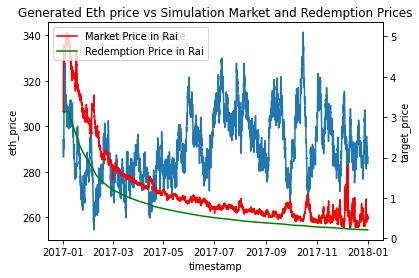

In [15]:
sns.lineplot(data=controller_on,x="timestamp", y="eth_price",label='Generated Eth price')
ax2 = plt.twinx()
sns.lineplot(data=controller_on,x="timestamp", y="market_price",ax=ax2,color='r',label='Market Price in Rai')
sns.lineplot(data=controller_on,x="timestamp", y="target_price",ax=ax2,color='g',label='Redemption Price in Rai')
plt.title('Generated Eth price vs Simulation Market and Redemption Prices')
plt.legend(loc="upper left")
plt.savefig('experiments/system_model_v3/punchline/punchline.png')

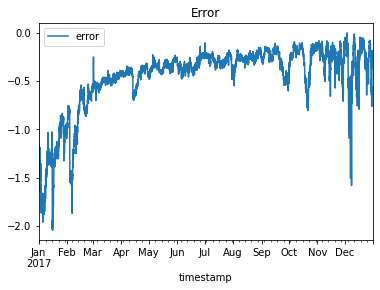

In [16]:
controller_on.plot(x='timestamp',y='error',kind='line',title='Error')

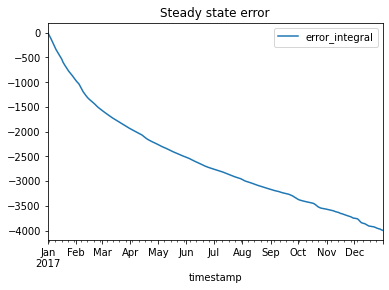

In [17]:
controller_on.plot(x='timestamp',y='error_integral',kind='line',title='Steady state error')

Text(0.5, 1.0, 'Simulation Market and Redemption Prices')

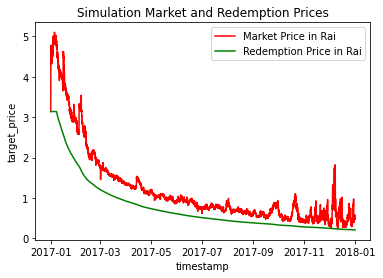

In [18]:
sns.lineplot(data=controller_on,x="timestamp", y="market_price",color='r',label='Market Price in Rai')
sns.lineplot(data=controller_on,x="timestamp", y="target_price",color='g',label='Redemption Price in Rai')
plt.title('Simulation Market and Redemption Prices')

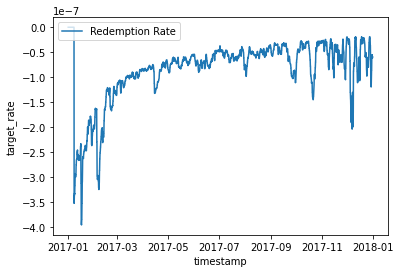

In [19]:
sns.lineplot(data=controller_on,x="timestamp", y="target_rate",label='Redemption Rate')
plt.legend(loc="upper left")
plt.show()

Text(0.5, 1.0, 'RAI balance')

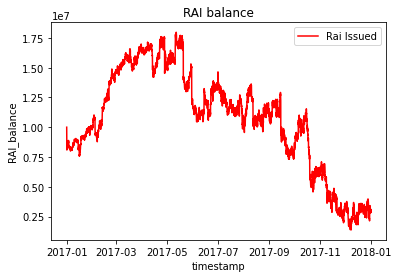

In [20]:
sns.lineplot(data=controller_on,x="timestamp", y="RAI_balance",color='r',label='Rai Issued')
plt.title('RAI balance')


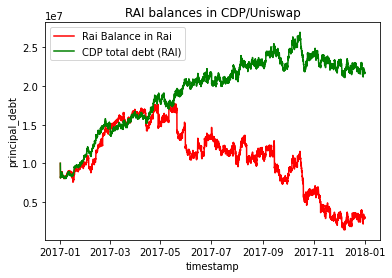

In [21]:
sns.lineplot(data=controller_on,x="timestamp", y="RAI_balance",color='r',label='Rai Balance in Rai')
sns.lineplot(data=controller_on,x="timestamp", y="principal_debt",color='g',label='CDP total debt (RAI)')
plt.title('RAI balances in CDP/Uniswap')
plt.legend(loc="upper left")
plt.savefig('experiments/system_model_v3/punchline/RAI_balances_in_CDPUniswap.png')

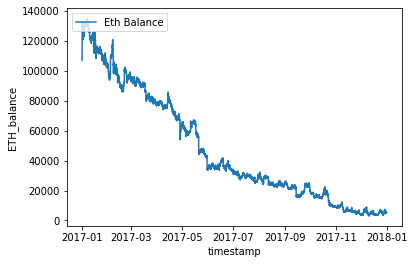

In [22]:
sns.lineplot(data=controller_on,x="timestamp", y="ETH_balance",label='Eth Balance')
plt.legend(loc="upper left")
plt.show()